In [1]:
# import all necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from utils.warmUpExercise import warmUpExercise
from utils.computeCost import computeCost
from utils.gradientDescent import gradientDescent
from utils.plotData import plotData
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Part 1: Basic Function

In [2]:
print('Running warmUpExercise ... \n')
print('5x5 Identity Matrix: \n')
print(warmUpExercise())

Running warmUpExercise ... 

5x5 Identity Matrix: 

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


# Part 2: Visualizing the training data

Plotting Data ...



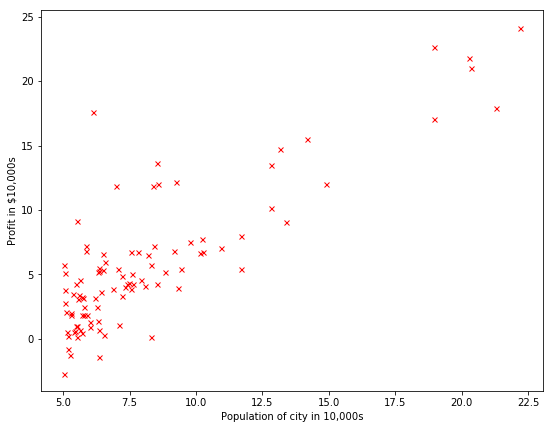

In [3]:
# ======================= Part 2: Plotting =======================
print('Plotting Data ...\n')
data1 = np.loadtxt("ex1data1.txt", delimiter=',')
X = data1[:, 0]
y = data1[:, 1]
plotData(X, y)

# Part 3: Cost and Gradient descent 

In [4]:
designMatrix = np.column_stack((np.ones(len(X)), X))  # adding a column of ones to x
theta = np.zeros((designMatrix.shape[1], 1))          # parameters that need to be learnt

cost = computeCost(designMatrix, y, theta)            # compute cost when both theta0 and theta1 are zero --> initial cost
print('\nTesting the cost function ...\n')
print('With theta = [0 ; 0]\nCost computed = ', cost, '\n')
print('Expected cost value (approx) 32.07\n')

iterations = 1500
alpha = 0.01


Testing the cost function ...

With theta = [0 ; 0]
Cost computed =  32.0727338775 

Expected cost value (approx) 32.07



In [5]:
# compute the cost with theta = [-1; 2] 
cost = computeCost(designMatrix, y, np.array([[-1], [2]]))
print('\nWith theta = [-1 ; 2]\nCost computed = ', cost, '\n')
print('Expected cost value (approx) 54.24\n')


With theta = [-1 ; 2]
Cost computed =  54.242455082 

Expected cost value (approx) 54.24



In [6]:
print('\nRunning Gradient Descent ...\n')
theta, J = (gradientDescent(designMatrix, y, theta, alpha, iterations))
print('Theta found by gradient descent:\n')
print('\n', theta[0], '\n', theta[1], '\n')
print('Expected theta values (approx)\n')
print(' -3.6303\n  1.1664\n\n')

plt.plot(X, designMatrix.dot(theta))

predict1 = np.sum(np.array([1, 3.5]).dot(theta))
print('For population = 35,000, we predict a profit of ', predict1*10000)
predict2 = np.sum(np.array([1, 7]).dot(theta))
print('For population = 70,000, we predict a profit of ', predict2*10000)


Running Gradient Descent ...

Theta found by gradient descent:


 [-3.63029144] 
 [ 1.16636235] 

Expected theta values (approx)

 -3.6303
  1.1664


For population = 35,000, we predict a profit of  4519.7678677
For population = 70,000, we predict a profit of  45342.4501294


# Part 4: Visualizing J(theta_0, theta_1)

<IPython.core.display.Javascript object>


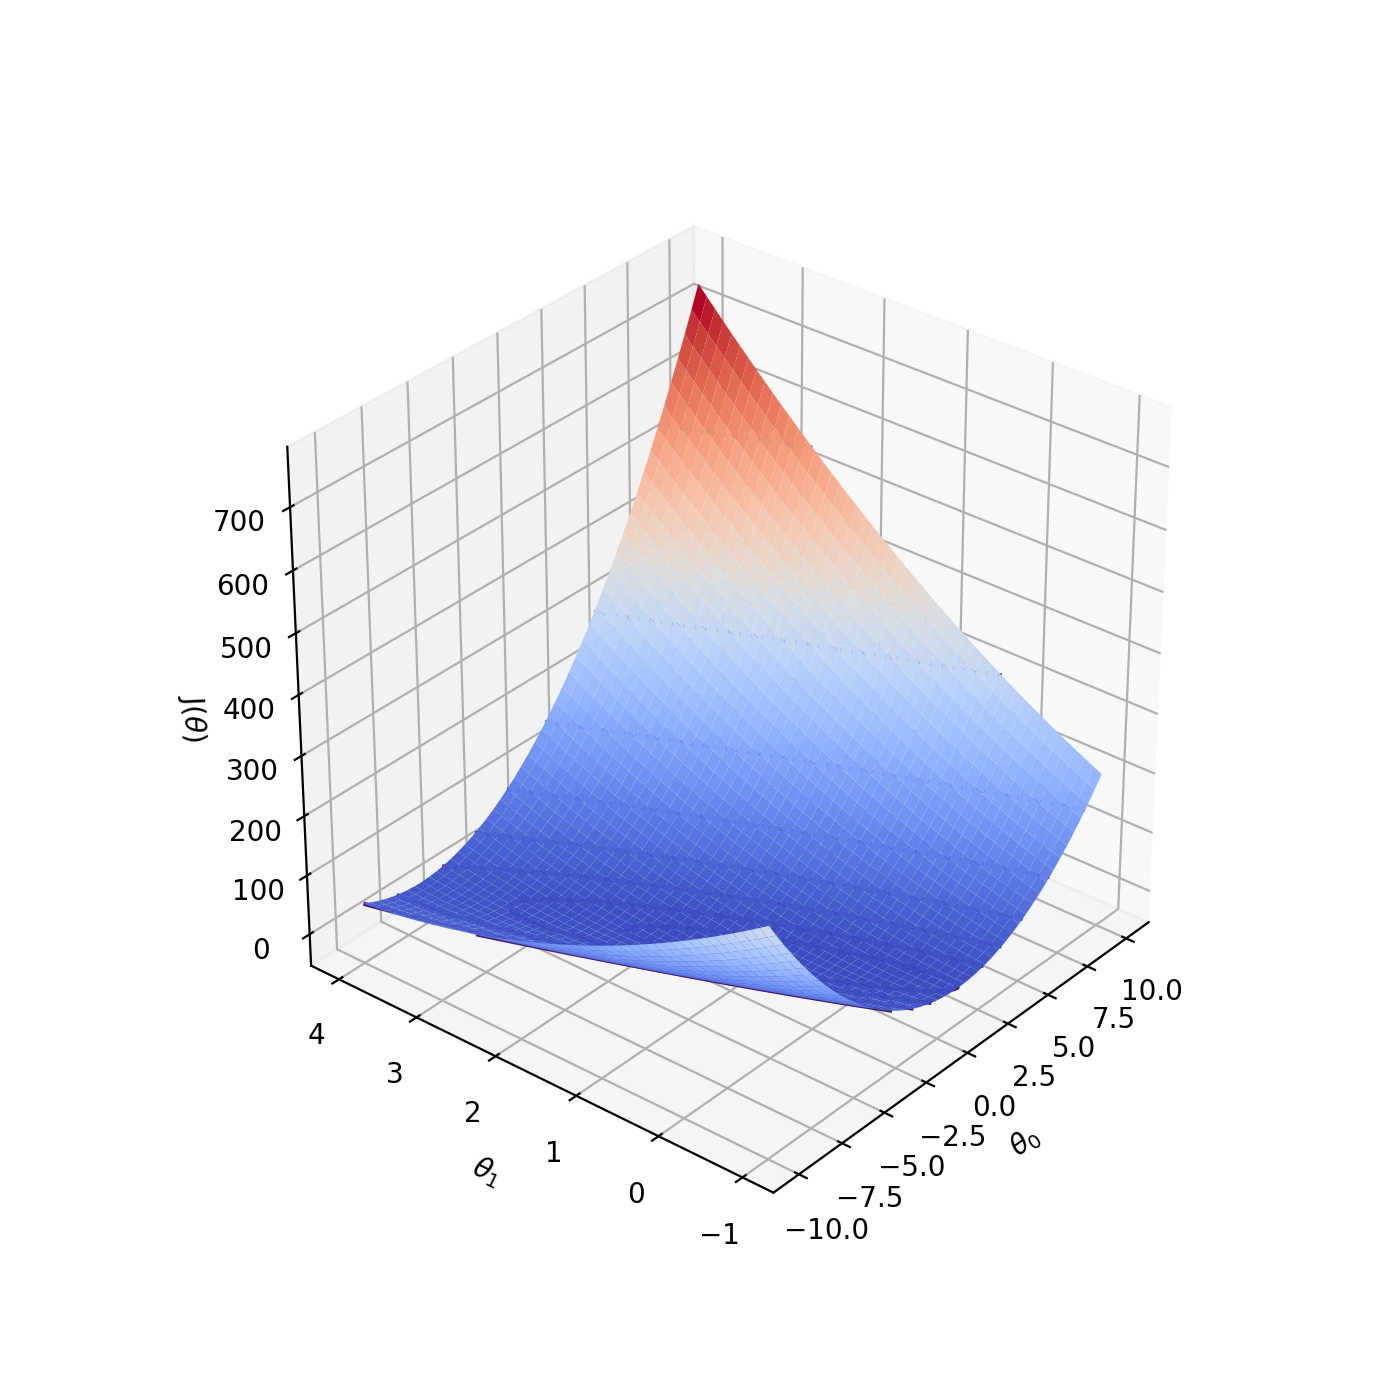

In [7]:
%matplotlib notebook

theta0_t = np.linspace(-10, 10, designMatrix.shape[0]) # linspace generates evenly spaced numbers 
theta1_t = np.linspace(-1, 4, designMatrix.shape[0])
J = np.zeros((X.shape[0], X.shape[0]))

for i in range(theta0_t.size): 
    for j in range(theta1_t.size):
        t = np.array([[theta0_t[i]], [theta1_t[j]]])
        J[i, j] = computeCost(designMatrix, y, t)      # compute cost for theta generated using linspace

theta0_t, theta1_t = np.meshgrid(theta0_t, theta1_t)

fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

ax.plot_surface(theta0_t, theta1_t, J, cmap=cm.coolwarm)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'J($\theta$)')

# Has some problem, contours are shown but a bit disoriented
CS = ax.contour(theta0_t, theta1_t, J, np.logspace(-2, 3, 20)) # contour is drawn on the 3d surface plot, to understand what exactly are contour plots
ax.scatter(theta[0], theta[1], c='r')